In [1]:
# First let's import the packages we will use in this project
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Configuration of plots

pd.options.mode.chained_assignment = None


In [2]:
# Now we need to read in the data
df = pd.read_csv('data/movies.csv')

In [3]:
#Chek wether there is duplicates or not

df.duplicated() #By default, for each set of duplicated values, the first occurrence is set on False and all others on True.
#df.duplicated(keep ='last') # by using last the last occurrence of each set of duplicated values is set on False and all others on True.
#df.duplicated(keep=False) #By setting keep on False, all duplicates are True.
#df.duplicated(subset=['genre']) #To find duplicates on specific column(s), use subset.



0       False
1       False
2       False
3       False
4       False
        ...  
7663    False
7664    False
7665    False
7666    False
7667    False
Length: 7668, dtype: bool

In [4]:
#chek if the datafram has null value
#for col in df.columns:
    ##print('{} - {}%'.format(col, round(pct_missing*100)), '\n') #rounded to one digit
#or
for col in df.columns:
    print(df[col].isnull().value_counts(), '\n') #exactly count number of null values in each column field

False    7668
Name: name, dtype: int64 

False    7591
True       77
Name: rating, dtype: int64 

False    7668
Name: genre, dtype: int64 

False    7668
Name: year, dtype: int64 

False    7666
True        2
Name: released, dtype: int64 

False    7665
True        3
Name: score, dtype: int64 

False    7665
True        3
Name: votes, dtype: int64 

False    7668
Name: director, dtype: int64 

False    7665
True        3
Name: writer, dtype: int64 

False    7667
True        1
Name: star, dtype: int64 

False    7665
True        3
Name: country, dtype: int64 

False    5497
True     2171
Name: budget, dtype: int64 

False    7479
True      189
Name: gross, dtype: int64 

False    7651
True       17
Name: company, dtype: int64 

False    7664
True        4
Name: runtime, dtype: int64 



In [ ]:
#to chek specific column null values
print(df['country'].isnull().value_counts())

country
False    5421
Name: count, dtype: int64


In [5]:
#drop null values from the data frame
df = df.dropna()

In [ ]:
#after droping null value all feature values check null return to False

for col in df.columns:
    print(df[col].isnull().value_counts(), '\n') #exactly count number of null values in each column field

name
False    5421
Name: count, dtype: int64 

rating
False    5421
Name: count, dtype: int64 

genre
False    5421
Name: count, dtype: int64 

year
False    5421
Name: count, dtype: int64 

released
False    5421
Name: count, dtype: int64 

score
False    5421
Name: count, dtype: int64 

votes
False    5421
Name: count, dtype: int64 

director
False    5421
Name: count, dtype: int64 

writer
False    5421
Name: count, dtype: int64 

star
False    5421
Name: count, dtype: int64 

country
False    5421
Name: count, dtype: int64 

budget
False    5421
Name: count, dtype: int64 

gross
False    5421
Name: count, dtype: int64 

company
False    5421
Name: count, dtype: int64 

runtime
False    5421
Name: count, dtype: int64 



In [ ]:
df['budget'].dtype

dtype('int64')

In [6]:
df['budget'] = df['budget'].astype('int64')

In [7]:
#Change data type float to int

df['gross'] = df['gross'].astype('int64')

In [8]:
# Add correct year column by extracting YYYY from the released column

df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [ ]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,386,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0,2009
7445,388,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0,2019
3045,4909,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0,1997
6663,3643,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0,2015
7244,389,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0,2018


In [9]:
# Sort the df by gross values descending order
df.sort_values(by=["gross"], inplace = True, ascending = False)

In [ ]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,386,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0,2009
7445,388,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0,2019
3045,4909,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0,1997
6663,3643,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0,2015
7244,389,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0,2018


In [ ]:
#Set to display all records of the dataframe-rows

pd.set_option('display.max_row', None)

In [ ]:
#to look the distinct values of compay
#df['company'].drop_duplicates().sort_values(ascending = False)

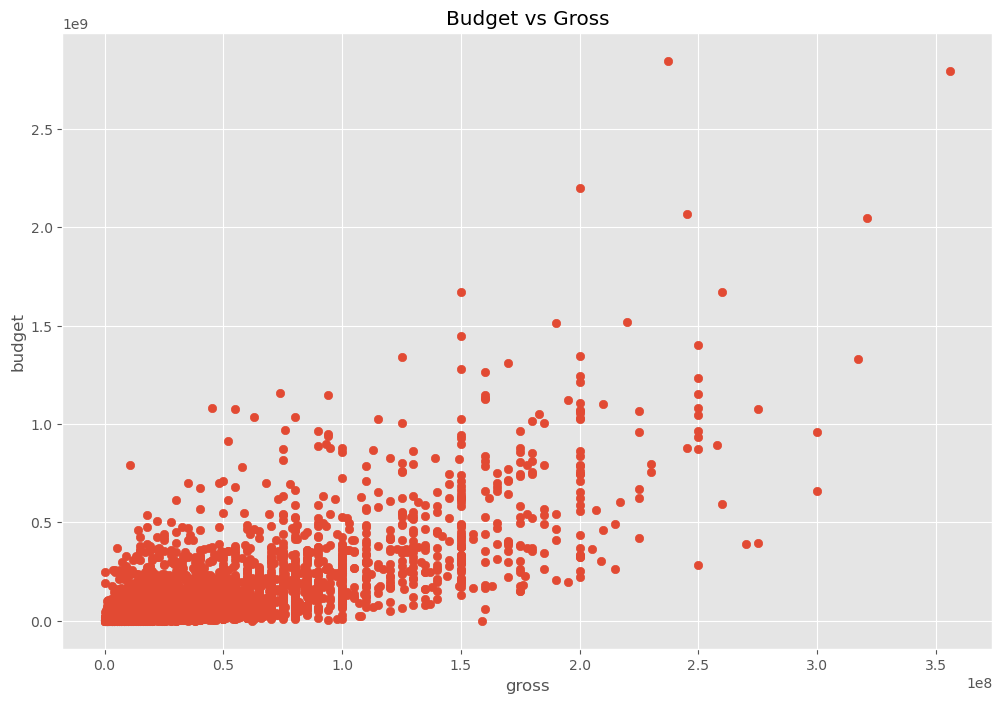

In [ ]:
#  Test the correlation between data
# Scater plot budget with gross revenue
plt.scatter(x = df['budget'], y = df['gross'])
plt.title('Budget vs Gross')
plt.xlabel('gross')
plt.ylabel('budget')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

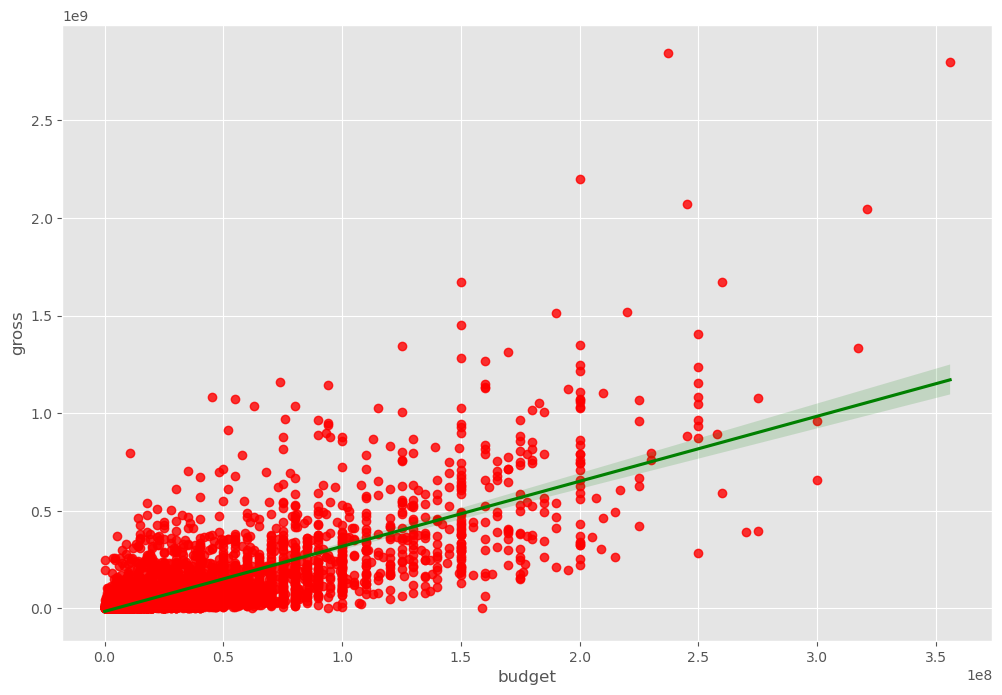

In [ ]:
# plot budget vs gross using sns
sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws={'color' : 'red'}, line_kws={'color' : 'green'})

In [ ]:
#chek the correlation between numeric field
# Example between budget assigned to make film and the gross revenue gained from the film

df.corr(method = 'pearson', numeric_only = True)  # general chek for all numeric data column
#method can be  ‘pearson’, ‘kendall’, ‘spearman’
#From this we can understand as there is hign correlation between budget & gross which is 0.74

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
yearcorrect,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


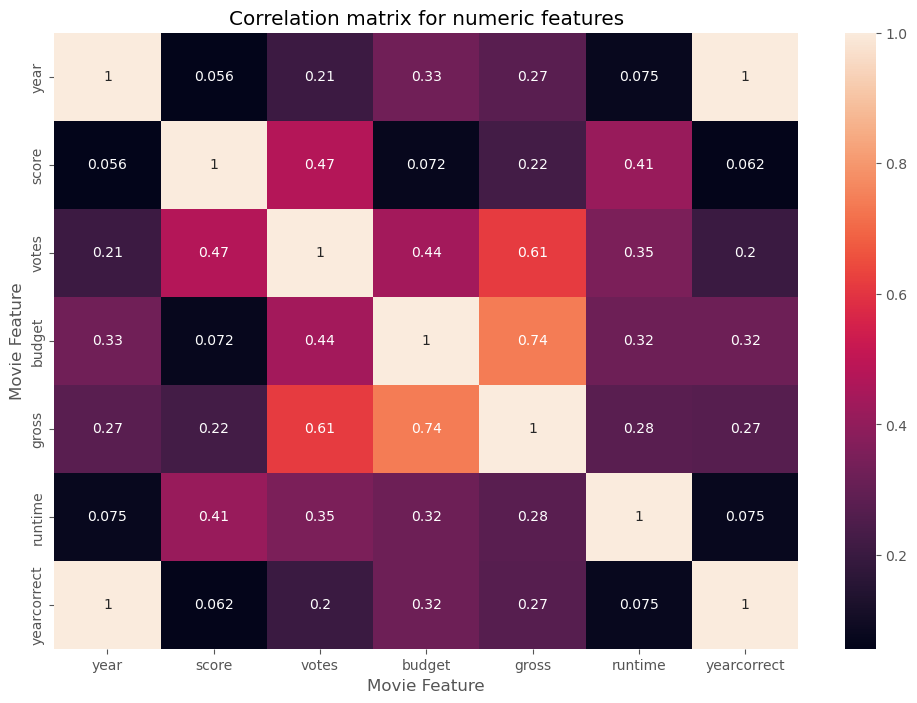

In [ ]:
#create correlation matrix and visualize
correlation_matrix = df.corr(method = 'pearson', numeric_only = True)
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation matrix for numeric features')
plt.xlabel('Movie Feature')
plt.ylabel('Movie Feature')
plt.show()

In [10]:
df_numerized = df

In [ ]:
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,386,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0,2009
7445,388,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0,2019
3045,4909,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0,1997
6663,3643,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0,2015
7244,389,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0,2018


In [ ]:
#Converting the object datatype to numeric value to check correlation
for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

# Using factorize - this assigns a random numeric value for each unique categorical value

#  df.apply(lambda x: x.factorize()[0]).corr(method='pearson')


In [ ]:
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,386,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0,2009
7445,388,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0,2019
3045,4909,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0,1997
6663,3643,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0,2015
7244,389,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3794,6,6,2009,890,5.8,3500.0,585,2924,1498,47,3000000,5073,1385,96.0,2015
2434,2969,5,0,1993,1467,4.5,1900.0,1805,3102,186,47,5000000,2970,1376,97.0,1994
3681,1595,3,6,2000,1721,6.8,43000.0,952,1683,527,6,5000000,2554,466,108.0,2001
272,2909,6,9,1982,1525,3.9,2300.0,261,55,1473,47,800000,2270,582,85.0,1982


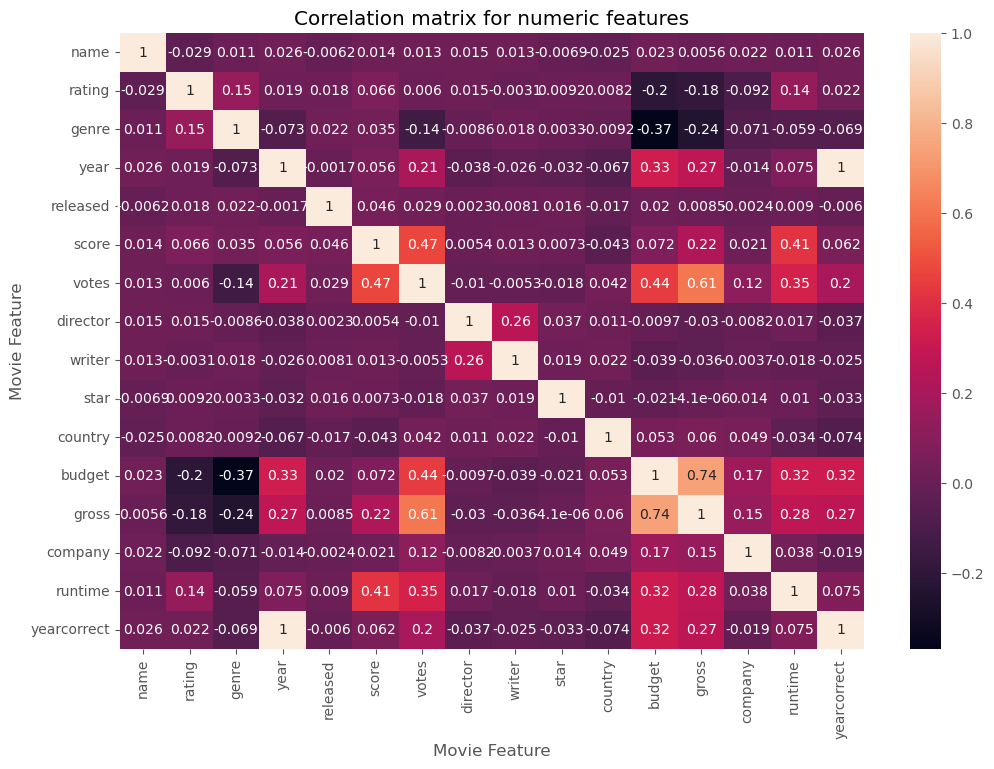

In [ ]:
#after convering non numeric column data type to numeric, show the correlation for each features(column) with one another

correlation_matrix = df.corr(method = 'pearson', numeric_only = True)
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation matrix for numeric features')
plt.xlabel('Movie Feature')
plt.ylabel('Movie Feature')
plt.show()

In [ ]:
# To look correlation out of the matrix

corr_pair = df_numerized.corr().unstack()
corr_pair

name         name           1.000000
             rating        -0.029234
             genre          0.010996
             year           0.025542
             released      -0.006152
             score          0.014450
             votes          0.012615
             director       0.015246
             writer         0.012880
             star          -0.006882
             country       -0.025490
             budget         0.023392
             gross          0.005639
             company        0.021697
             runtime        0.010850
             yearcorrect    0.025542
rating       name          -0.029234
             rating         1.000000
             genre          0.147796
             year           0.019499
             released       0.018083
             score          0.065983
             votes          0.006031
             director       0.014656
             writer        -0.003149
             star           0.009196
             country        0.008230
 

In [ ]:
#Sort unstack corr_pair the correlation by values
sorted_pair = corr_pair.sort_values()
sorted_pair

genre        budget        -0.368523
budget       genre         -0.368523
gross        genre         -0.244101
genre        gross         -0.244101
rating       budget        -0.203946
budget       rating        -0.203946
rating       gross         -0.181906
gross        rating        -0.181906
votes        genre         -0.135990
genre        votes         -0.135990
company      rating        -0.092357
rating       company       -0.092357
country      yearcorrect   -0.073569
yearcorrect  country       -0.073569
year         genre         -0.073167
genre        year          -0.073167
             company       -0.071334
company      genre         -0.071334
genre        yearcorrect   -0.069147
yearcorrect  genre         -0.069147
year         country       -0.066748
country      year          -0.066748
genre        runtime       -0.059237
runtime      genre         -0.059237
score        country       -0.043051
country      score         -0.043051
writer       budget        -0.039466
b

In [ ]:
# Filter the correlation by specifying the correlation value
high_corr = sorted_pair[(sorted_pair) > 0.5]
high_corr

gross        votes          0.614751
votes        gross          0.614751
gross        budget         0.740247
budget       gross          0.740247
year         yearcorrect    0.998726
yearcorrect  year           0.998726
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 83.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 77.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 22.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 93.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 63.6% of the points cannot be plac

<Axes: xlabel='rating', ylabel='gross'>

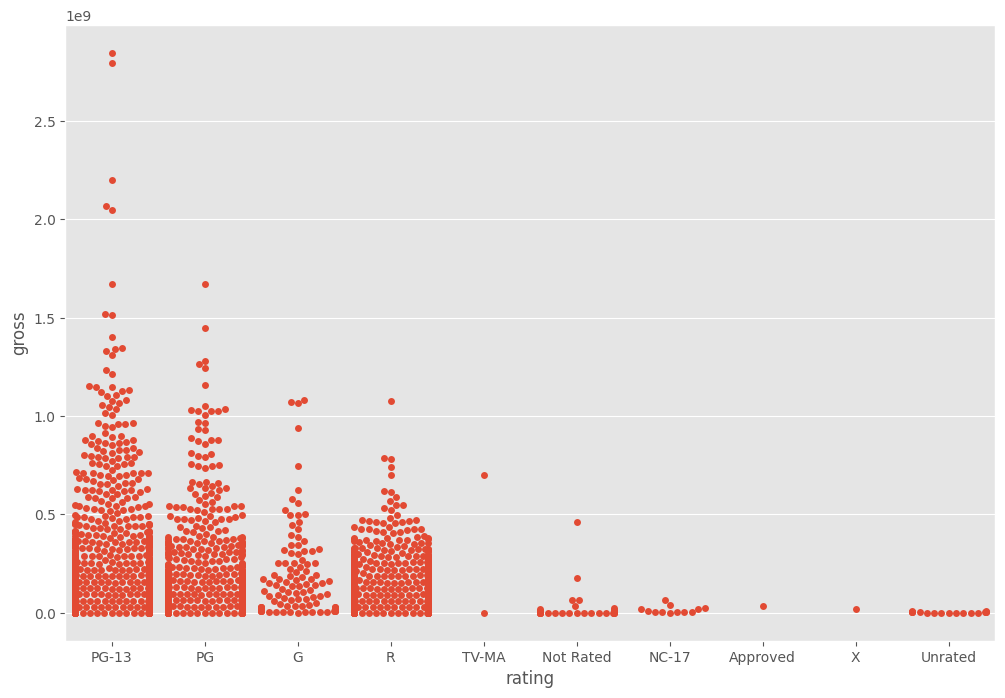

In [11]:
sns.swarmplot(x="rating", y="gross", data=df_numerized)

<Axes: xlabel='rating', ylabel='gross'>

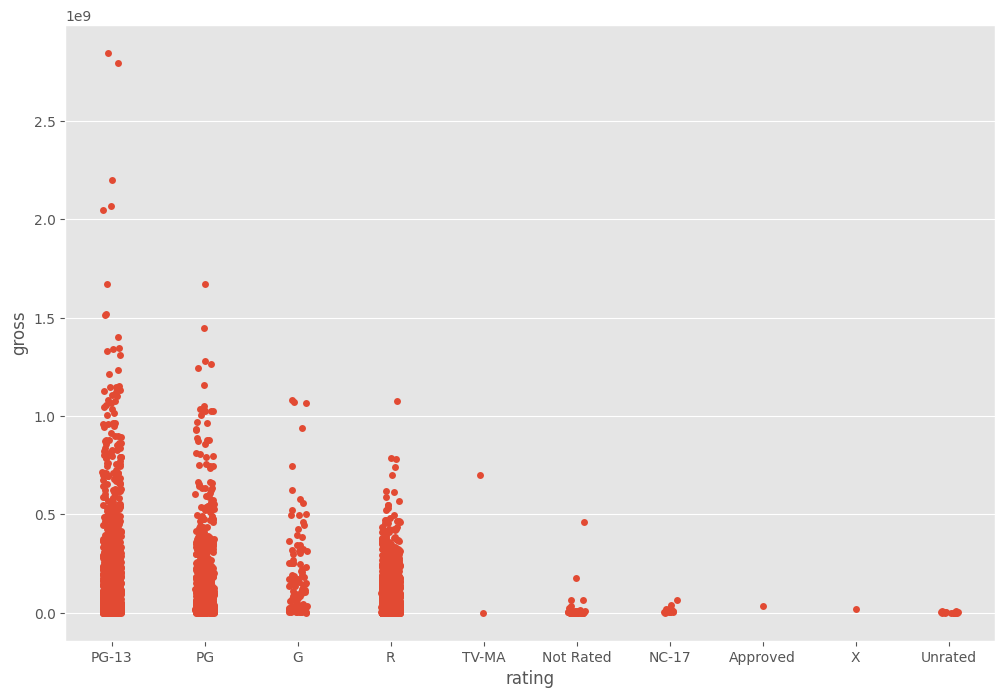

In [12]:
sns.stripplot(x="rating", y="gross", data=df_numerized)